Analisis data country \
(Ni Kadek Emik Sapitri)

# load data dan data cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_country = pd.read_csv('country_data.csv')
data_country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
data_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
data_country['country'].value_counts()

country
Afghanistan    1
Morocco        1
Myanmar        1
Namibia        1
Nepal          1
              ..
Georgia        1
Germany        1
Ghana          1
Greece         1
Zambia         1
Name: count, Length: 167, dtype: int64

Karena semua value countsnya 1 dan ada 167 baris, berarti data tersebut tiap barisnya memuat nama negara yang berbeda.

In [5]:
#karena tipe data sudah sesuai, lanjut cek missing value

data_country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
#tidak ada missing value, lanjut cek data terduplikasi

data_country.duplicated().sum()

0

# rata-rata child_mort (child mortality rate) untuk negara-negara dengan income di atas 10000.

In [7]:
filter_income = data_country[data_country['income'] > 10000]
print('Daftar negara dengan income di atas 10000\n', filter_income[['country','child_mort', 'income']])
print('\nRata-rata child mortality rate untuk negara-negara dengan income di atas 10000 yaitu', 
      filter_income['child_mort'].mean())

Daftar negara dengan income di atas 10000
                   country  child_mort  income
2                 Algeria        27.3   12900
4     Antigua and Barbuda        10.3   19100
5               Argentina        14.5   18700
7               Australia         4.8   41400
8                 Austria         4.3   43200
..                    ...         ...     ...
157  United Arab Emirates         8.6   57600
158        United Kingdom         5.2   36200
159         United States         7.3   49400
160               Uruguay        10.6   17100
163             Venezuela        17.1   16500

[83 rows x 3 columns]

Rata-rata child mortality rate untuk negara-negara dengan income di atas 10000 yaitu 13.13734939759036


# negara yang memiliki life_expec (life expectancy) di bawah 60 tahun.

In [8]:
filter_le = data_country[data_country['life_expec'] < 60]
print('Daftar negara yang memiliki life expectancy di bawah 60 tahun:\n', filter_le[['country','life_expec']])

Daftar negara yang memiliki life expectancy di bawah 60 tahun:
                       country  life_expec
0                 Afghanistan        56.2
21                   Botswana        57.1
25               Burkina Faso        57.9
26                    Burundi        57.7
28                   Cameroon        57.3
31   Central African Republic        47.5
32                       Chad        56.5
37           Congo, Dem. Rep.        57.5
40              Cote d'Ivoire        56.3
63                     Guinea        58.0
64              Guinea-Bissau        55.6
66                      Haiti        32.1
87                    Lesotho        46.5
94                     Malawi        53.1
97                       Mali        59.5
106                Mozambique        54.5
108                   Namibia        58.6
112                     Niger        58.8
132              Sierra Leone        55.0
137              South Africa        54.3
147                  Tanzania        59.3
150         

# penambahan kolom trade_balance yang berisi data kolom exports - kolom imports.

In [9]:
data_country['trade_balance'] = data_country['exports'] - data_country['imports']
data_country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,trade_balance
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-34.9
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,-20.6
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,7.0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,19.4
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,-13.4
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,-6.1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,10.9
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,-8.2
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,-4.4


# statistik deskriptif untuk kolom total_fer (fertility rate) dan child_mort.

In [10]:
print('Statistik deskriptif untuk fertility rate dan child mortality rate:\n', 
      data_country[['total_fer', 'child_mort']].describe())

Statistik deskriptif untuk fertility rate dan child mortality rate:
         total_fer  child_mort
count  167.000000  167.000000
mean     2.947964   38.270060
std      1.513848   40.328931
min      1.150000    2.600000
25%      1.795000    8.250000
50%      2.410000   19.300000
75%      3.880000   62.100000
max      7.490000  208.000000


In [11]:
#cara lain dengan aggregate
print('Statistik deskriptif (mean, median, std) untuk fertility rate dan child mortality rate:\n', 
      data_country[['total_fer', 'child_mort']].agg(['mean', 'median', 'std']))

Statistik deskriptif (mean, median, std) untuk fertility rate dan child mortality rate:
         total_fer  child_mort
mean     2.947964   38.270060
median   2.410000   19.300000
std      1.513848   40.328931


# Income berdasarkan Life Expectancy

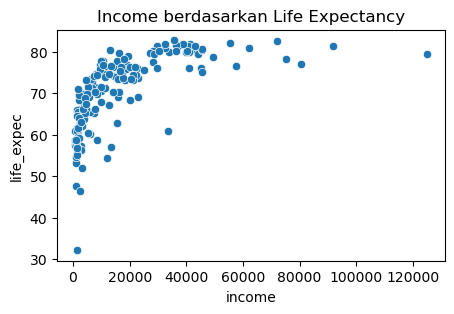

In [12]:
plt.figure(figsize=[5,3])
sns.scatterplot(x = 'income', y = 'life_expec', data = data_country)
plt.title('Income berdasarkan Life Expectancy')
plt.show()

# negara dengan jumlah gdp terbanyak dan terendah.

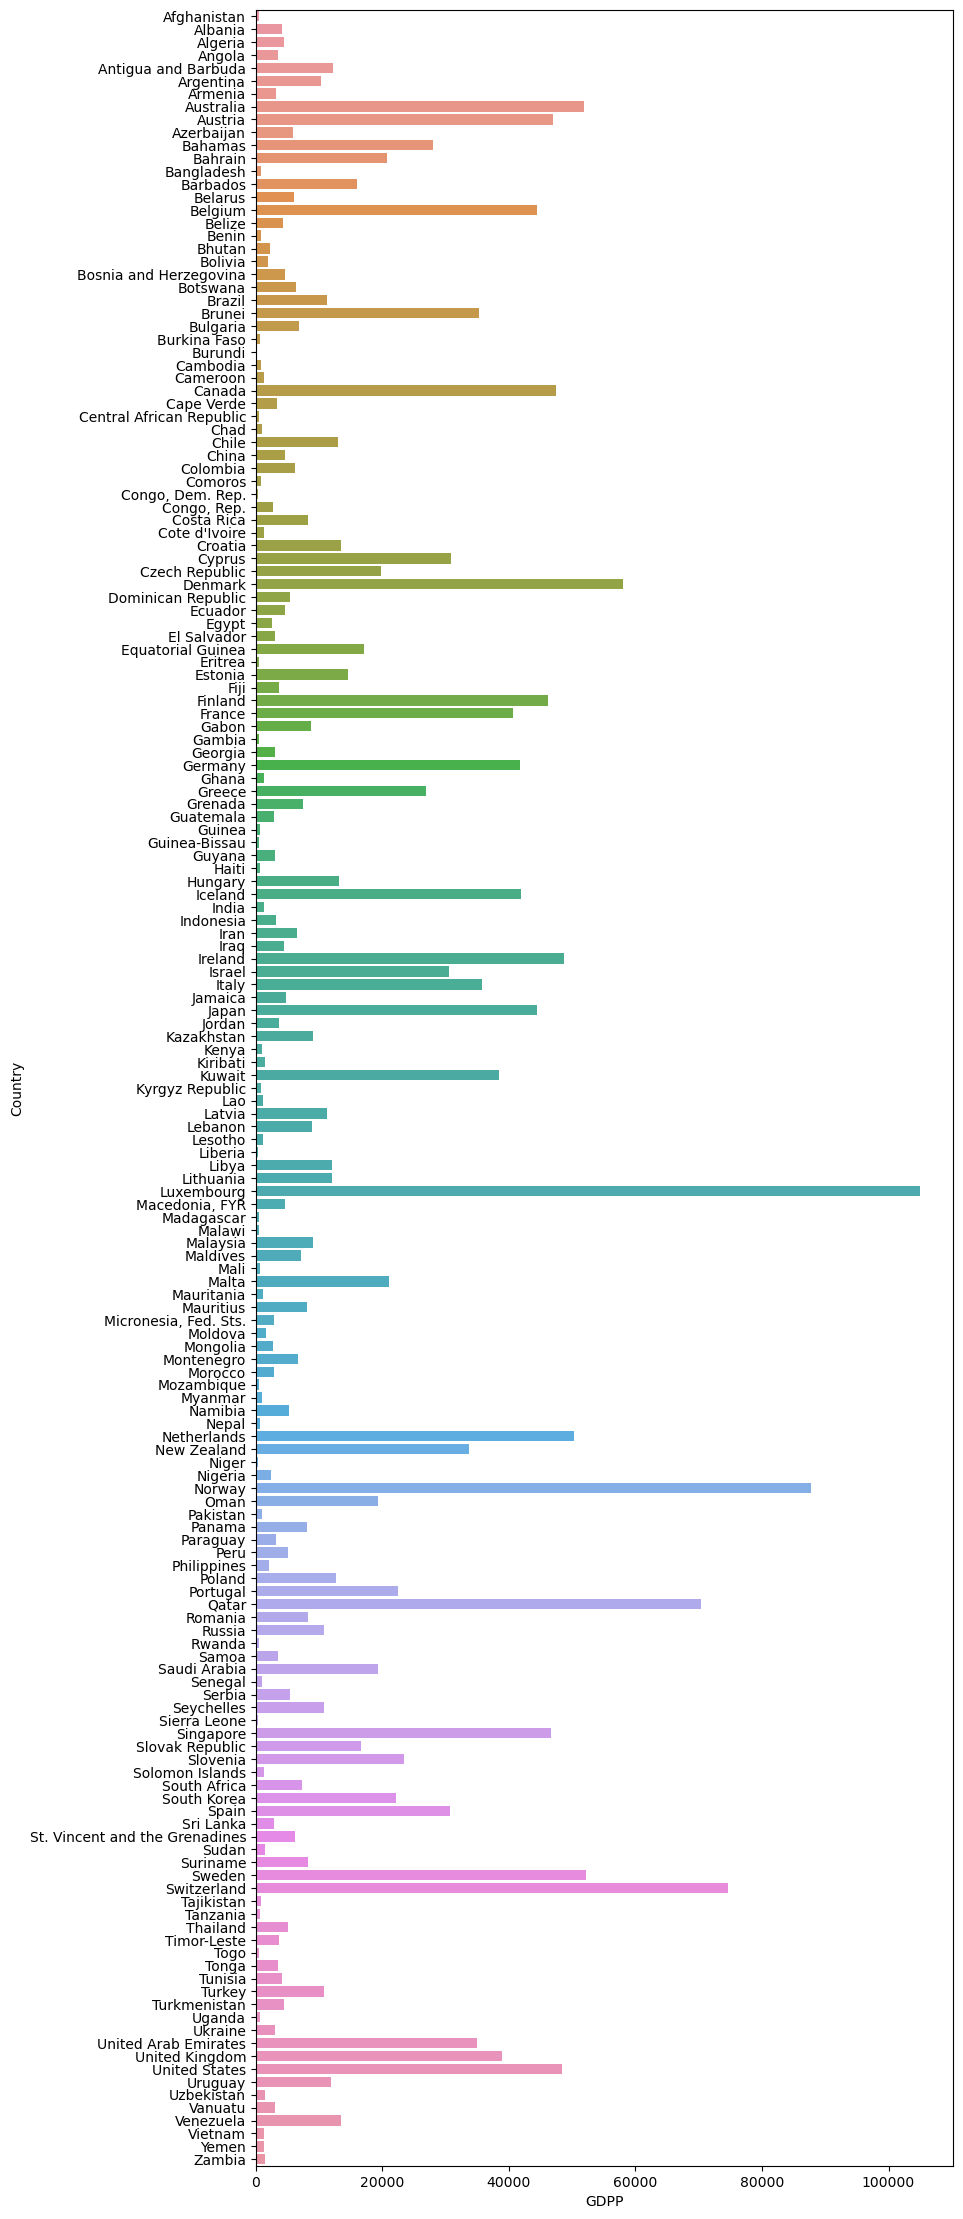

In [13]:
plt.figure(figsize=[9,28])
sns.barplot(y = 'country', x = 'gdpp', data = data_country)

#ax = sns.barplot(y='country', x='gdpp', data=data_country, color='skyblue')
#ax.bar_label(ax.containers[0], fmt='%.0f')

plt.ylabel('Country')
plt.xlabel('GDPP')
plt.show()

In [17]:
filter_gdpp = data_country.groupby('country')['gdpp'].sum()
filter_gdpp 

country
Afghanistan              553
Albania                 4090
Algeria                 4460
Angola                  3530
Antigua and Barbuda    12200
                       ...  
Vanuatu                 2970
Venezuela              13500
Vietnam                 1310
Yemen                   1310
Zambia                  1460
Name: gdpp, Length: 167, dtype: int64

In [15]:
print('Negara dengan jumlah GDPP terbanyak:', filter_gdpp.idxmax())
print('Negara dengan jumlah GDPP terendah:', filter_gdpp.idxmin())

Negara dengan jumlah GDPP terbanyak: Luxembourg
Negara dengan jumlah GDPP terendah: Burundi


# inflasi negara Afghanistan, albania dan angola 

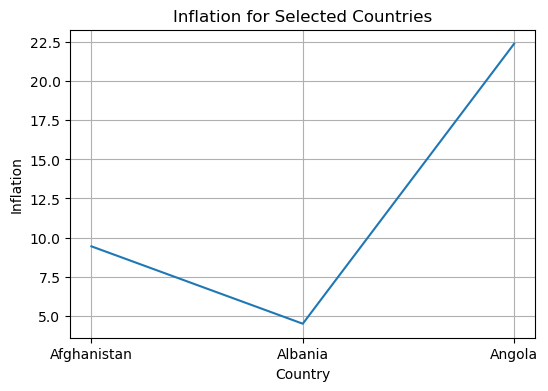

In [16]:
selected_countries = ['Afghanistan', 'Albania', 'Angola']
filtered_data = data_country[data_country['country'].isin(selected_countries)]

plt.figure(figsize=(6, 4))
plt.plot(filtered_data['country'], filtered_data['inflation'])
plt.title('Inflation for Selected Countries')
plt.xlabel('Country')
plt.ylabel('Inflation')
plt.grid(True)
plt.show()